In [35]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Load some data

In [59]:
import os
import gdal
import scipy.ndimage

path = os.path.expanduser('/Users/rohankumar/Desktop/GeoPlanetary_Project/pds-geosciences.wustl.edu/mex/mex-m-hrsc-5-refdr-dtm-v1/mexhrs_2001/data/0360')

fl = []
data, dataSmall = None, None
for file in os.listdir(path):
    if file.endswith(".img"):
        fl = fl+[os.path.join(path, file)]
        inDataSource = gdal.Open(fl[-1])
        band = inDataSource.GetRasterBand(1)
        arr = band.ReadAsArray()
        arrSmall = scipy.ndimage.zoom(arr, 0.05, order=3)
        if arr.shape[1] == 2504:
            pass
        if data is not None:
            data = np.concatenate((data,arr), axis=None)
            dataSmall = np.concatenate((dataSmall,arrSmall), axis=None)
        else:
            data = arr
            dataSmall = arrSmall
        print(file, data.shape, dataSmall.shape)
del arr

y_size, x_size, bands = np.array(data.shape)
ySmall_size, xSmall_size, bands = np.array(dataSmall.shape)
bandsOrder = [os.path.basename(f).split('.')[0][0:-1].split('_')[-1] for f in fl]

bandsName = [
'Red (750±20 nm)',
'Green ( 530±45 nm)',
'Blue (440±45 nm)',
'IR (970±45 nm)',
]

sortInd = np.array([3,1,0,2])

data = data[:,:,sortInd]
dataSmall = dataSmall[:,:,sortInd]
    

h0360_0000_ir4.img (10894, 2504) (545, 125)
h0360_0000_da4.img (54546258,) (136250,)
h0360_0000_dt4.img (81813940,) (204375,)
h0360_0000_bl4.img (109092516,) (272500,)
h0360_0000_gr4.img (136371092,) (340625,)
h0360_0000_re4.img (163649668,) (408750,)
h0360_0000_nd4.img (600106884,) (1500429,)


ValueError: not enough values to unpack (expected 3, got 1)

In [66]:
fig, axes = plt.subplots(ncols=bands+1, sharex=True, sharey=True, figsize=[20,12])

#colormaps for    R           G             B                   IR
cms = [plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r, plt.cm.RdYlBu_r]

for a,i in zip(axes.flatten()[0:-1],np.arange(data.shape[2])):
    a.imshow(data[:,:,i], cmap=cms[i])
    a.set_title(bandsName[i])
    
axes.flatten()[-1].imshow(data[:,:,0:3])
axes.flatten()[-1].set_title('RGB')


dataCut = data[50:4050,500:2200,:]
dataCutSmall.shape
# x, y, spectral
# number of spectra
dataCut[:,:,0].size
6800000

NameError: name 'bands' is not defined

In [61]:
import scipy.misc
dataCut = data[50:4050,500:2200,:]
dataCutSmall = scipy.misc.imresize(dataCut, 0.1, interp='bilinear')

yCut_size, xCut_size , bands = np.array(dataCut.shape)
yCutSmall_size, xCutSmall_size , bands = np.array(dataCutSmall.shape)

del data
del dataSmal

IndexError: too many indices for array

NameError: name 'dataCut' is not defined

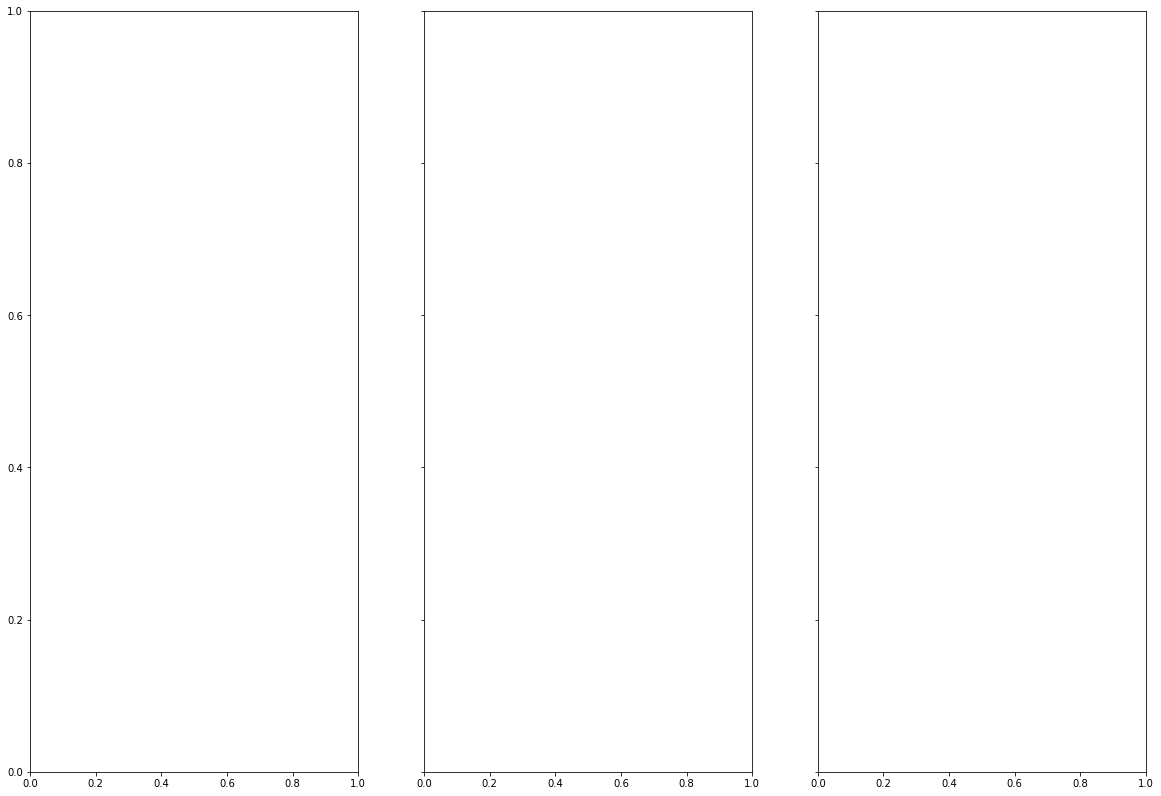

In [62]:
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=[20,14])

axes[0].imshow(dataCut[:,:,0:3], extent=(0,dataCutSmall.shape[1],0,dataCutSmall.shape[0]))
axes[0].set_title(bandsName[0])

axes[1].imshow(dataCut[:,:,3],cmap=plt.cm.RdYlBu_r, extent=(0,dataCutSmall.shape[1],0,dataCutSmall.shape[0]))
axes[1].set_title(bandsName[3])

axes[2].imshow(dataCut[:,:,0],cmap=plt.cm.Greys_r, extent=(0,dataCutSmall.shape[1],0,dataCutSmall.shape[0]))
axes[2].imshow(dataCutSmall[:,:,3],cmap=plt.cm.RdYlBu_r, extent=(0,dataCutSmall.shape[1],0,dataCutSmall.shape[0]), alpha=0.3)
axes[2].set_title('%s Full Image\n+\n%s Small Image overlay' % (bandsName[0],bandsName[3]))